<a href="https://www.kaggle.com/code/sc1drofficial/clientretentionai?scriptVersionId=199637594" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Problem Definition: Customer Churn Prediction
**What is customer churn?**  
Customer churn refers to the process by which clients stop using a company's product or service. It is measured as a percentage and is a crucial indicator of business health.

**Why is customer churn important for businesses?**

1. **Financial Losses**: Retaining customers is cheaper than acquiring new ones. A mere 5% increase in retention can lead to a 25-95% increase in profits.

2. **Company Image**: High churn rates can negatively affect a company's reputation, reducing trust from potential customers.

3. **Increased Marketing Costs**: Companies spend more to attract new customers, leading to higher operational expenses.

4. **Loss of Insights**: Departing customers may provide valuable feedback about product shortcomings, which shou>ld be considered for improvements.

### Conclusion  
Using machine learning to predict customer churn allows companies to proactively identify at-risk groups and develop retention strategies, ultimately enhancing financial performance and strengthening customer relationships.

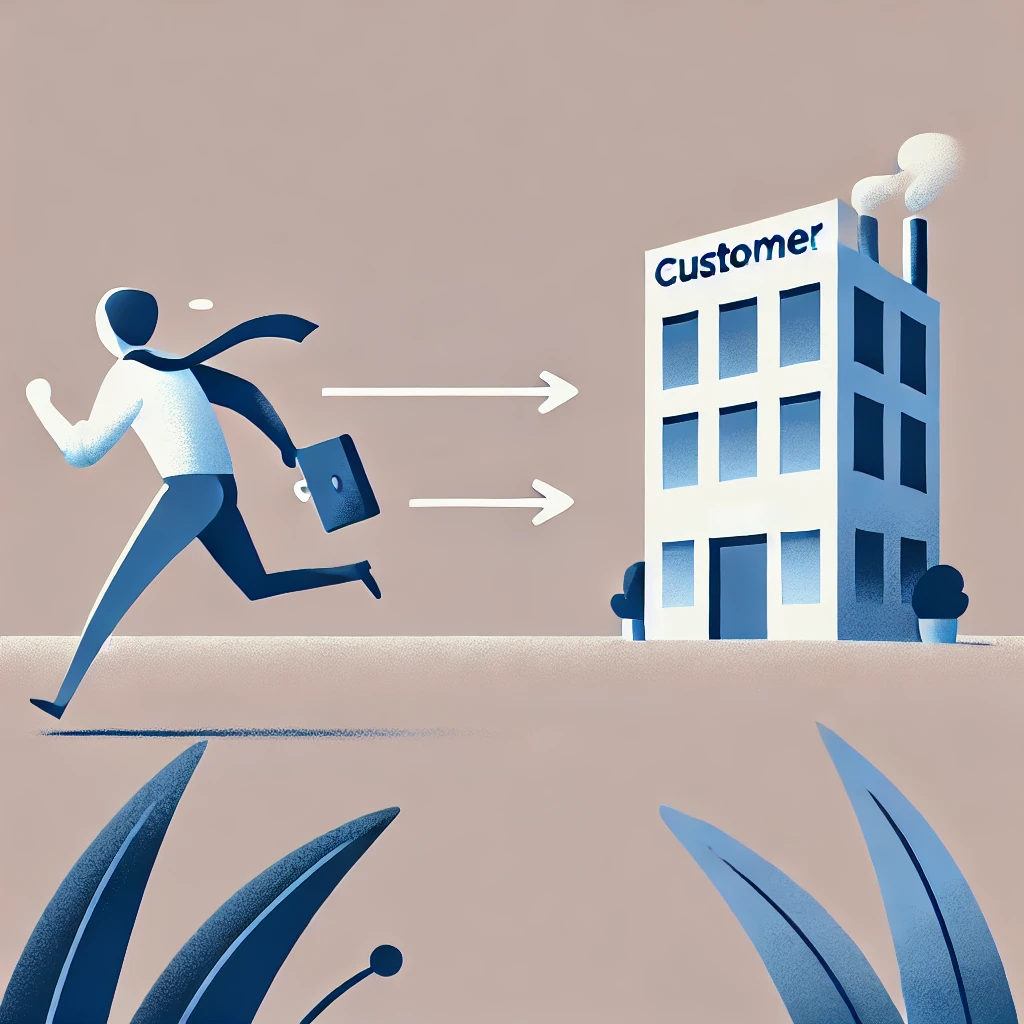

In [ ]:
# Install the necessary libraries

!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [4]:
import pandas as pd  # Import the pandas library

# Load the dataset directly by its filename
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
print(data.head())

# Output information about the dataset
print(data.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
# Check for missing values
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
print(f'Duplicate rows: {duplicate_count}')


Duplicate rows: 0


In [8]:
# Get descriptive statistics
print(data.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


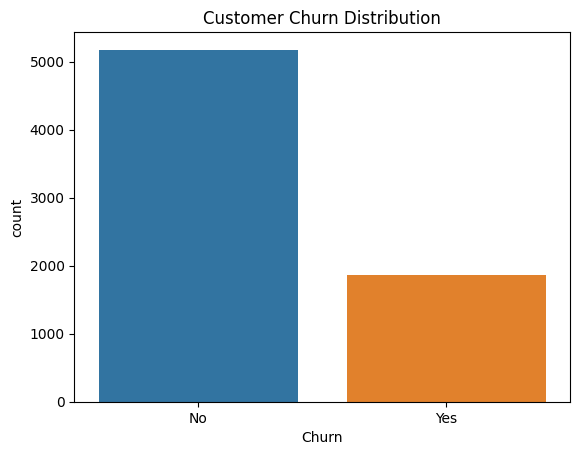

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable (Churn)
sns.countplot(x='Churn', data=data)
plt.title('Customer Churn Distribution')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Building a model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8239886444286728
              precision    recall  f1-score   support

       False       0.86      0.91      0.88      1036
        True       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

